# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [364]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
import datetime as dt     


In [365]:
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [366]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [367]:
# List for holding lat_lngs and cities
lat_lngs = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lats = np.random.uniform(low=-90.000, high=90.000, size=10)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=10)
lat_lngs = zip(lats, lngs)

len(lats)

1500

In [368]:
weather_frame = pd.DataFrame({'lats':lats,
                           'lngs':lngs})
weather_frame['city']=""
weather_frame.tail()

,lats,lngs,city
1495,34.123157,55.342803,
1496,-13.322635,-169.907748,
1497,62.274573,-33.722460,
1498,18.395953,-19.958239,
1499,-74.015557,-3.477742,


In [369]:
# Identify nearest city for each lat, lng combination
cities = []

for index, row in weather_frame.iterrows():
    
    city = citipy.nearest_city(row['lats'], row['lngs']).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
       
    if (len(cities) == 500):
        break
    
    weather_frame.loc[index,'city'] = city
    
# Print the city count to confirm sufficient count
print(f'No of cities - {len(cities)}')

No of cities - 500


In [370]:
weather_frame2 = weather_frame.loc[weather_frame['city']!= '',:]

In [371]:
weather_frame = weather_frame2.head(500)
weather_frame.count()

lats    500
lngs    500
city    500
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [372]:
url = "http://api.openweathermap.org/data/2.5/weather?"

weather_frame['country'] = ""
weather_frame['ID'] = ""
weather_frame['temperature'] = ""    
weather_frame['humidity'] = ""
weather_frame['cloudiness'] = ""
weather_frame['wind_speed'] = ""

C:\Users\chith\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\chith\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chith\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [373]:
weather_frame = weather_frame.dropna()   
weather_frame.head()

,lats,lngs,city,country,ID,temperature,humidity,cloudiness,wind_speed
0,3.306243,61.609522,victoria,,,,,,
1,-83.607549,95.768273,albany,,,,,,
2,0.460059,164.861485,bairiki,,,,,,
3,-82.696604,-79.347899,ushuaia,,,,,,
4,4.471690,170.029404,butaritari,,,,,,


In [374]:

for index, row in weather_frame.iterrows():
    
    # Build query URL
    query_url = f"{url}appid={api_key}&q={row['city']}"
    weather_data = requests.get(query_url).json()
    try:
        weather_frame.loc[index,'country'] = weather_data['sys']['country']
        weather_frame.loc[index,'ID'] = weather_data['id']
        weather_frame.loc[index,'temperature'] = weather_data['main']['temp']    
        weather_frame.loc[index,'humidity'] = weather_data['main']['humidity']
        weather_frame.loc[index,'cloudiness'] = weather_data['clouds']['all']
        weather_frame.loc[index,'wind_speed'] = weather_data['wind']['speed']
        print(f"Processing city - {row['city']}, ID number -{weather_data['id']} ") 
        time.sleep(5)
    except(KeyError):
        print('skip city')
       

Processing city - victoria, ID number -1733782 
Processing city - albany, ID number -5106834 
skip city
Processing city - ushuaia, ID number -3833367 
Processing city - butaritari, ID number -2110227 
Processing city - verkhoyansk, ID number -2013465 
Processing city - constitucion, ID number -4011743 
Processing city - mataura, ID number -6201424 
Processing city - aklavik, ID number -5882953 
skip city
Processing city - luwingu, ID number -908913 
Processing city - zhuanghe, ID number -1784055 
Processing city - atuona, ID number -4020109 
Processing city - yulara, ID number -6355222 
Processing city - hobart, ID number -2163355 
Processing city - harper, ID number -4696310 
Processing city - narsaq, ID number -3421719 
Processing city - puerto colombia, ID number -3671497 
skip city
Processing city - guerrero negro, ID number -4021858 
Processing city - grand forks, ID number -5059429 
skip city
Processing city - ushuaia, ID number -3833367 
Processing city - mataura, ID number -620

ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?appid=1b4d2c6cf56c5b9d0478e8ef46f1e221&q=bogorodskoye (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000168E568F550>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [375]:
weather_frame['date'] = pd.to_datetime('today').strftime("%m/%d/%Y")
weather_frame.head()

,lats,lngs,city,country,ID,temperature,humidity,cloudiness,wind_speed,date
0,3.306243,61.609522,victoria,BN,1733782,299.36,79,75,2.6,09/12/2018
1,-83.607549,95.768273,albany,US,5106834,292.57,100,90,1.5,09/12/2018
2,0.460059,164.861485,bairiki,,,,,,,09/12/2018
3,-82.696604,-79.347899,ushuaia,AR,3833367,281.15,75,75,9.3,09/12/2018
4,4.471690,170.029404,butaritari,KI,2110227,302.1,100,48,3.71,09/12/2018


In [376]:
weather_frame = weather_frame.loc[weather_frame['temperature']!= '']
weather_frame.to_csv(output_data_file)
weather_frame.head()

,lats,lngs,city,country,ID,temperature,humidity,cloudiness,wind_speed,date
0,3.306243,61.609522,victoria,BN,1733782,299.36,79,75,2.6,09/12/2018
1,-83.607549,95.768273,albany,US,5106834,292.57,100,90,1.5,09/12/2018
3,-82.696604,-79.347899,ushuaia,AR,3833367,281.15,75,75,9.3,09/12/2018
4,4.471690,170.029404,butaritari,KI,2110227,302.1,100,48,3.71,09/12/2018
5,65.853496,133.630844,verkhoyansk,RU,2013465,279.25,63,0,1.66,09/12/2018


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [377]:
# function for setting chart properties

def chart_propoerties (x,y, value):
    fig,ax = plt.subplots()
    ax = plt.scatter(x=x,y=y)

    plt.title(f"Latitude vs. {value} on {weather_frame.date.unique()}" )
    plt.xlabel('Latitudes')
    plt.ylabel(f'{value}')
    plt.grid()
    plt.savefig(f'../output_data/Latitude vs {value}.png')
    plt.show()
    
    

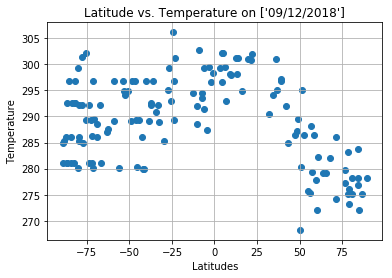

In [378]:
x = weather_frame['lats'] 
y = weather_frame['temperature'].astype(np.float) 

chart_propoerties (x,y, 'Temperature')

#### Latitude vs. Humidity Plot

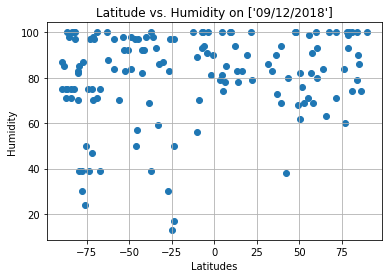

In [379]:
x = weather_frame['lats'] 
y = weather_frame['humidity']
chart_propoerties (x,y, 'Humidity')

#### Latitude vs. Cloudiness Plot

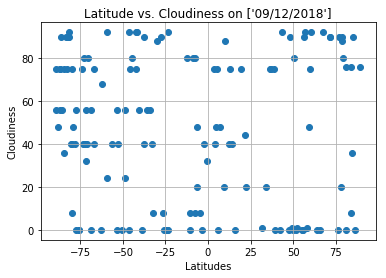

In [380]:
x = weather_frame['lats'] 
y = weather_frame['cloudiness']

chart_propoerties (x,y, 'Cloudiness')

#### Latitude vs. Wind Speed Plot

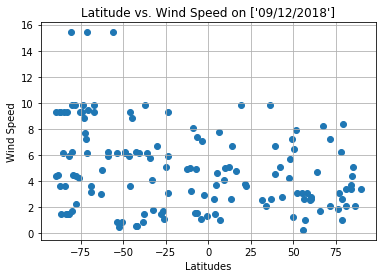

In [381]:
x = weather_frame['lats'] 
y = weather_frame['wind_speed']
chart_propoerties (x,y, 'Wind Speed')